In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display

In [2]:
import numpy as np

In [3]:
def show_state(env, episode,step, info=""):
    plt.figure(99999,figsize=[8,6])
    plt.clf()
    plt.imshow(env.render(mode='rgb_array'))
    plt.title("episode: {} step: {} ".format(episode,step))
    #plt.title("%s | Step: %d %s" % (env._spec.id,step, info))
    plt.axis('off')

    display.clear_output(wait=True)
    display.display(plt.gcf())

In [4]:
import gym

In [5]:
env = gym.make('CartPole-v1')

In [6]:
env = gym.wrappers.Monitor(env, '../mp4/cartpole-5',video_callable=lambda episode_id: True)
#env = gym.wrappers.Monitor(env, '../mp4/cartpole-5',video_callable=lambda episode_id: episode_id%10==0)

In [7]:
%%time

num_episodes=1000

steps_total=np.full([num_episodes],-999,dtype=np.int32)

for i_episode in range(num_episodes):
    
    state = env.reset()
    #for step in range(100):
    step=0
    while True:
        
        step+=1
        
        action=env.action_space.sample()
        
        new_state, reward, done, info = env.step(action)
        
        #print(new_state)
        #print(info)
            
        #show_state(env.env,i_episode,step)
        env.render()
        
        if done:
            steps_total[i_episode]=step
            #print("Episode finished after: {}".format(step))
            break
        

CPU times: user 4min 27s, sys: 55 s, total: 5min 22s
Wall time: 6min 33s


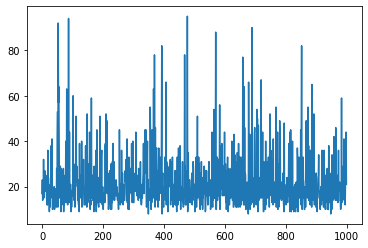

In [9]:
plt.plot(steps_total)
plt.show()

In [10]:
print("Average number of steps: {}". format(np.average(steps_total)))

Average number of steps: 22.089


In [8]:
import site

In [9]:
site.getsitepackages()

['/opt/conda/lib/python3.6/site-packages']

In [10]:
!ls /opt/conda/lib/python3.6/site-packages/gym

__init__.py  core.py  error.py	 spaces  vector      wrappers
__pycache__  envs     logger.py  utils	 version.py


In [11]:
!ls /opt/conda/lib/python3.6/site-packages/gym/envs

__init__.py  algorithmic  box2d		   mujoco	    robotics  toy_text
__pycache__  atari	  classic_control  registration.py  tests     unittest


In [12]:
!cat /opt/conda/lib/python3.6/site-packages/gym/envs/__init__.py

from gym.envs.registration import registry, register, make, spec

# Algorithmic
# ----------------------------------------

register(
    id='Copy-v0',
    entry_point='gym.envs.algorithmic:CopyEnv',
    max_episode_steps=200,
    reward_threshold=25.0,
)

register(
    id='RepeatCopy-v0',
    entry_point='gym.envs.algorithmic:RepeatCopyEnv',
    max_episode_steps=200,
    reward_threshold=75.0,
)

register(
    id='ReversedAddition-v0',
    entry_point='gym.envs.algorithmic:ReversedAdditionEnv',
    kwargs={'rows' : 2},
    max_episode_steps=200,
    reward_threshold=25.0,
)

register(
    id='ReversedAddition3-v0',
    entry_point='gym.envs.algorithmic:ReversedAdditionEnv',
    kwargs={'rows' : 3},
    max_episode_steps=200,
    reward_threshold=25.0,
)

register(
    id='DuplicatedInput-v0',
    entry_point='gym.envs.algorithmic:DuplicatedInputEnv',
    max_episode_steps=200,
    reward_threshold=9.0,
)

register(
    id='Reverse-v0',
    entry_point='gym.envs.algorithmic:ReverseEnv

In [13]:
!ls /opt/conda/lib/python3.6/site-packages/gym/envs/classic_control

__init__.py  assets			 mountain_car.py
__pycache__  cartpole.py		 pendulum.py
acrobot.py   continuous_mountain_car.py  rendering.py


In [14]:
!less /opt/conda/lib/python3.6/site-packages/gym/envs/classic_control/__init__.py

from gym.envs.classic_control.cartpole import CartPoleEnv
from gym.envs.classic_control.mountain_car import MountainCarEnv
from gym.envs.classic_control.continuous_mountain_car import Continuous_MountainCarEnv
from gym.envs.classic_control.pendulum import PendulumEnv
from gym.envs.classic_control.acrobot import AcrobotEnv

(END)thon3.6/site-packages/gym/envs/classic_control/__init__.py (END)

In [18]:
!cat /opt/conda/lib/python3.6/site-packages/gym/envs/classic_control/cartpole.py

"""
Classic cart-pole system implemented by Rich Sutton et al.
Copied from http://incompleteideas.net/sutton/book/code/pole.c
permalink: https://perma.cc/C9ZM-652R
"""

import math
import gym
from gym import spaces, logger
from gym.utils import seeding
import numpy as np

class CartPoleEnv(gym.Env):
    """
    Description:
        A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The pendulum starts upright, and the goal is to prevent it from falling over by increasing and reducing the cart's velocity.

    Source:
        This environment corresponds to the version of the cart-pole problem described by Barto, Sutton, and Anderson

    Observation: 
        Type: Box(4)
        Num	Observation                 Min         Max
        0	Cart Position             -4.8            4.8
        1	Cart Velocity             -Inf            Inf
        2	Pole Angle                 -24 deg        24 deg
        3	Pole Velocity At Tip      -Inf         